In [67]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gamma
import seaborn as sns

In [3]:
df = pd.read_csv("filtered_metadata.tsv", sep="\t")

In [4]:
df

,strain,generation,fitness,num_date,date,year,month
0,sample_10000_79,10000,0.139349,2050.00,2050-01-01,2050,1
1,sample_10000_94,10000,0.152067,2050.00,2050-01-01,2050,1
2,sample_10000_19,10000,0.166518,2050.00,2050-01-01,2050,1
3,sample_10000_38,10000,0.148693,2050.00,2050-01-01,2050,1
4,sample_10000_49,10000,0.141225,2050.00,2050-01-01,2050,1
...,...,...,...,...,...,...,...
9615,sample_9984_36,9984,0.135595,2049.92,2049-12-02,2049,12
9616,sample_9984_60,9984,0.161356,2049.92,2049-12-02,2049,12
9617,sample_9996_21,9996,0.147882,2049.98,2049-12-23,2049,12
9618,sample_9988_74,9988,0.126783,2049.94,2049-12-09,2049,12


Text(0, 0.5, 'Number of samples')

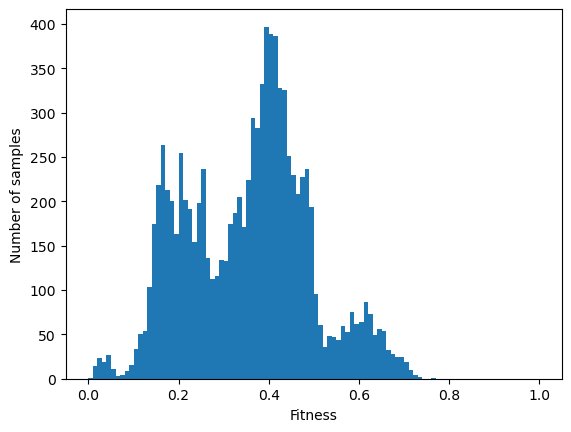

In [28]:
plt.hist(df["fitness"], bins=np.arange(0, 1.01, 0.01))
plt.xlabel("Fitness")
plt.ylabel("Number of samples")

Text(0, 0.5, 'Fitness')

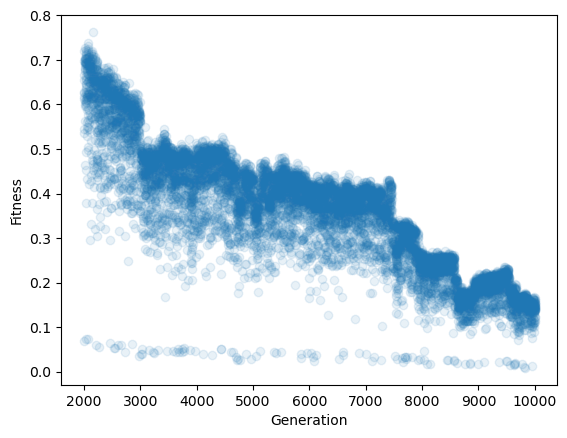

In [29]:
plt.plot(df["generation"], df["fitness"], "o", alpha=0.1)
plt.xlabel("Generation")
plt.ylabel("Fitness")

In [11]:
max_fitness_by_generation = df.groupby("generation")["fitness"].max().reset_index()

In [12]:
max_fitness_by_generation

,generation,fitness
0,2000,0.625076
1,2004,0.616723
2,2008,0.719283
3,2012,0.703083
4,2016,0.726486
...,...,...
1984,9984,0.166956
1985,9988,0.158478
1986,9992,0.138688
1987,9996,0.155665


In [15]:
annotated_df = df.merge(max_fitness_by_generation, on="generation", how="left", suffixes=["", "_max"])

In [16]:
annotated_df.head()

,strain,generation,fitness,num_date,date,year,month,fitness_max
0,sample_10000_79,10000,0.139349,2050.0,2050-01-01,2050,1,0.166518
1,sample_10000_94,10000,0.152067,2050.0,2050-01-01,2050,1,0.166518
2,sample_10000_19,10000,0.166518,2050.0,2050-01-01,2050,1,0.166518
3,sample_10000_38,10000,0.148693,2050.0,2050-01-01,2050,1,0.166518
4,sample_10000_49,10000,0.141225,2050.0,2050-01-01,2050,1,0.166518


In [17]:
annotated_df["normalized_fitness"] = annotated_df["fitness"] / annotated_df["fitness_max"]

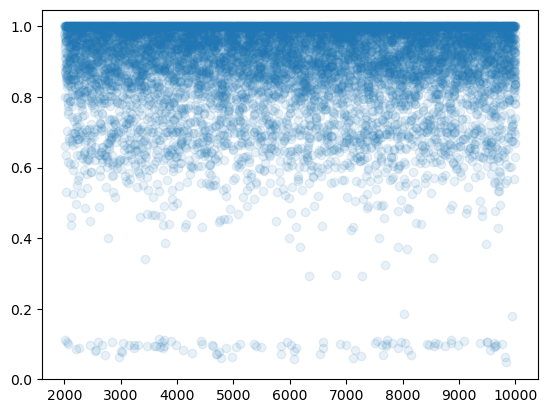

In [19]:
plt.plot(annotated_df["generation"], annotated_df["normalized_fitness"], "o", alpha=0.1)

Text(0, 0.5, 'Number of samples')

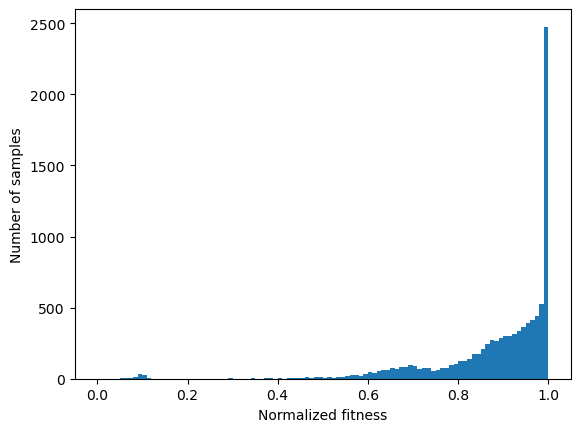

In [25]:
plt.hist(annotated_df["normalized_fitness"], bins=np.arange(0, 1.01, 0.01))
plt.xlabel("Normalized fitness")
plt.ylabel("Number of samples")

In [30]:
annotated_df["normalized_fitness"].value_counts()

1.000000    2050
0.900000      12
0.900000      10
0.900000       8
0.810000       7
            ... 
0.994817       1
0.952191       1
0.977575       1
0.931320       1
0.898063       1
Name: normalized_fitness, Length: 7398, dtype: int64

In [31]:
annotated_df.shape

(9620, 9)

In [33]:
shape = 1.87
location = 6.97
scale = 51.93

In [35]:
n = annotated_df.shape[0]

In [36]:
samples = gamma.rvs(
    a=shape,
    loc=location,
    scale=scale,
    size=n,
)

Text(0, 0.5, 'Number of samples')

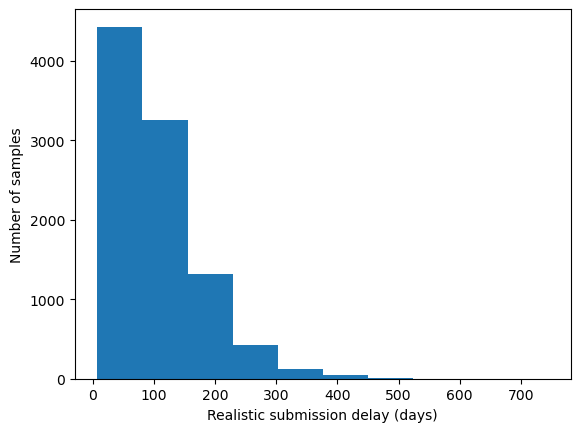

In [40]:
plt.hist(samples)
plt.xlabel("Realistic submission delay (days)")
plt.ylabel("Number of samples")

In [41]:
samples.shape

(9620,)

In [44]:
samples.mean()

104.46140863170226

In [43]:
continuous_samples = annotated_df["normalized_fitness"].values * samples

In [127]:
annotated_df["continuous_delay"] = continuous_samples

In [128]:
annotated_df.head()

,strain,generation,fitness,num_date,date,year,month,fitness_max,normalized_fitness,categorical_delay,fitness_is_max,continuous_delay
0,sample_10000_79,10000,0.139349,2050.0,2050-01-01,2050,1,0.166518,0.836838,215.626416,False,180.444459
1,sample_10000_94,10000,0.152067,2050.0,2050-01-01,2050,1,0.166518,0.913215,130.840167,False,119.485184
2,sample_10000_19,10000,0.166518,2050.0,2050-01-01,2050,1,0.166518,1.000000,108.021541,True,108.021541
3,sample_10000_38,10000,0.148693,2050.0,2050-01-01,2050,1,0.166518,0.892954,297.164791,False,265.354362
4,sample_10000_49,10000,0.141225,2050.0,2050-01-01,2050,1,0.166518,0.848105,198.291300,False,168.171862


Text(0, 0.5, 'Number of samples')

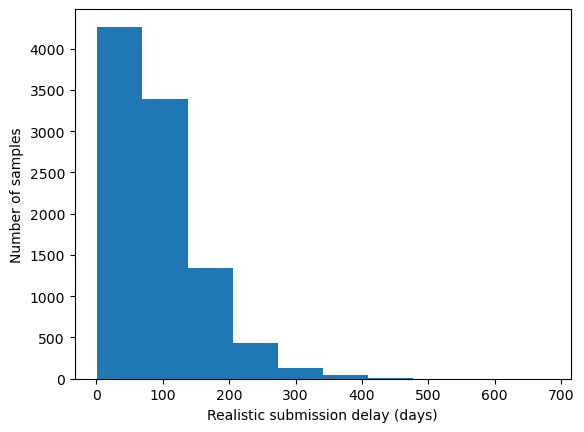

In [45]:
plt.hist(continuous_samples)
plt.xlabel("Realistic submission delay (days)")
plt.ylabel("Number of samples")

In [46]:
continuous_samples.mean()

92.69579341307626

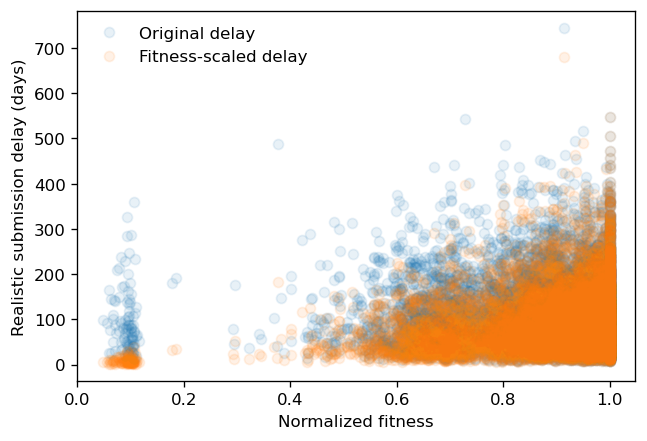

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=120)
ax.plot(
    annotated_df["normalized_fitness"],
    samples,
    "o",
    alpha=0.1,
    label="Original delay",
)

ax.plot(
    annotated_df["normalized_fitness"],
    continuous_samples,
    "o",
    alpha=0.1,
    label="Fitness-scaled delay",
)

ax.set_xlabel("Normalized fitness")
ax.set_ylabel("Realistic submission delay (days)")

ax.legend(frameon=False)

Text(0, 0.5, 'Fitness-scaled delay')

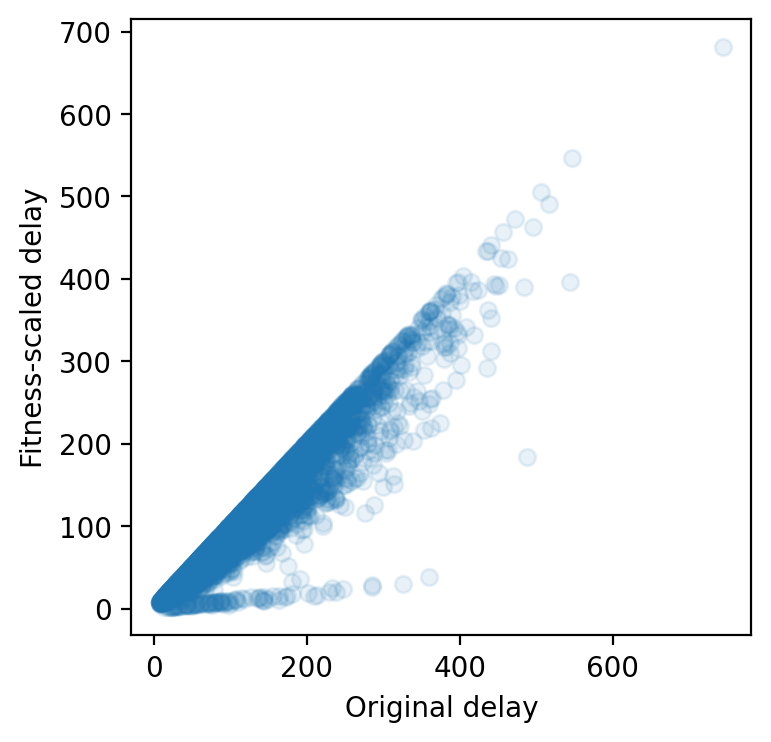

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=200)
ax.plot(
    samples,
    continuous_samples,
    "o",
    alpha=0.1,
)

ax.set_xlabel("Original delay")
ax.set_ylabel("Fitness-scaled delay")

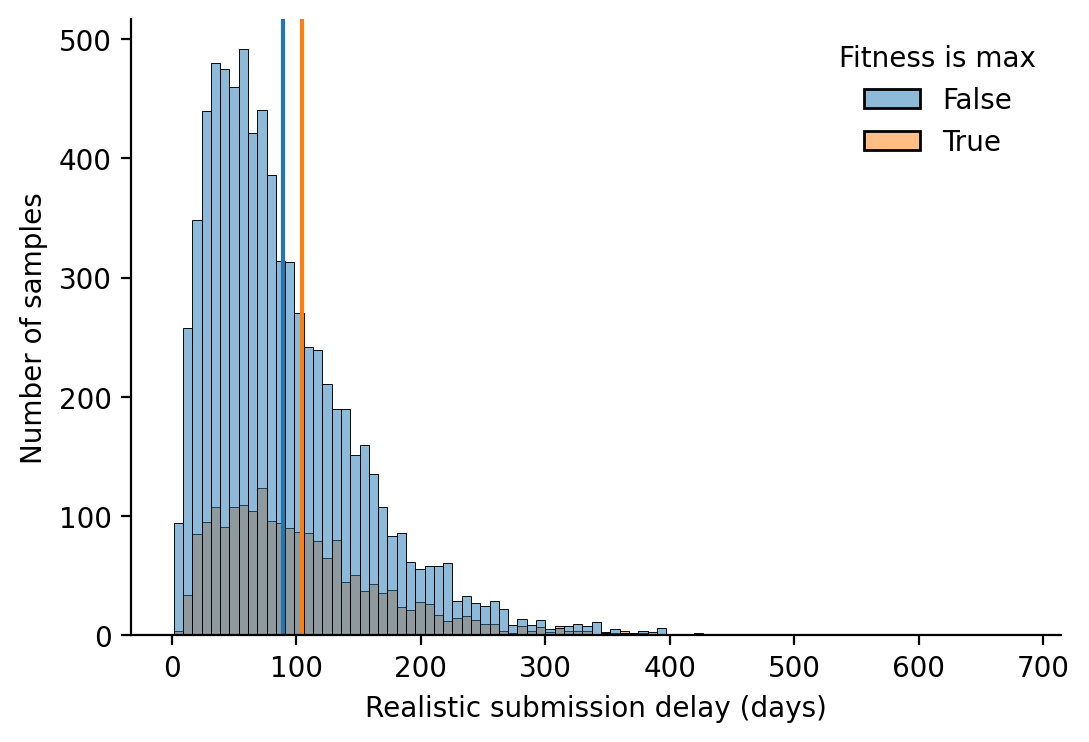

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
ax = sns.histplot(
    data=annotated_df,
    x="continuous_delay",
    hue="fitness_is_max",
    ax=ax,
)

mean_fitness_is_not_max = annotated_df[~annotated_df["fitness_is_max"]]["continuous_delay"].mean()
mean_fitness_is_max = annotated_df[annotated_df["fitness_is_max"]]["continuous_delay"].mean()

ax.axvline(x=mean_fitness_is_not_max, label="mean delay fitness < 1", color="C0")
ax.axvline(x=mean_fitness_is_max, label="mean delay fitness = 1", color="C1")

ax.set_xlabel("Realistic submission delay (days)")
ax.set_ylabel("Number of samples")

legend = ax.get_legend()
legend.set_title("Fitness is max")
legend.set_frame_on(False)

sns.despine()

In [130]:
annotated_df.groupby("fitness_is_max")["continuous_delay"].mean()

fitness_is_max
False     89.581882
True     104.194480
Name: continuous_delay, dtype: float64

In [56]:
second_samples = gamma.rvs(
    a=shape,
    loc=location,
    scale=scale,
    size=n,
)

In [57]:
second_samples

array([111.17470994,  50.78043844,  83.57507113, ...,  83.67615966,
       226.52993956,  61.54070189])

In [59]:
normalized_fitnesses = annotated_df["normalized_fitness"].values

In [107]:
categorical_samples = [
    samples[i] if fitness < 1 else max(samples[i], second_samples[i])
    for i, fitness in enumerate(normalized_fitnesses)
]

Text(0, 0.5, 'Categorical delay by fitness=1')

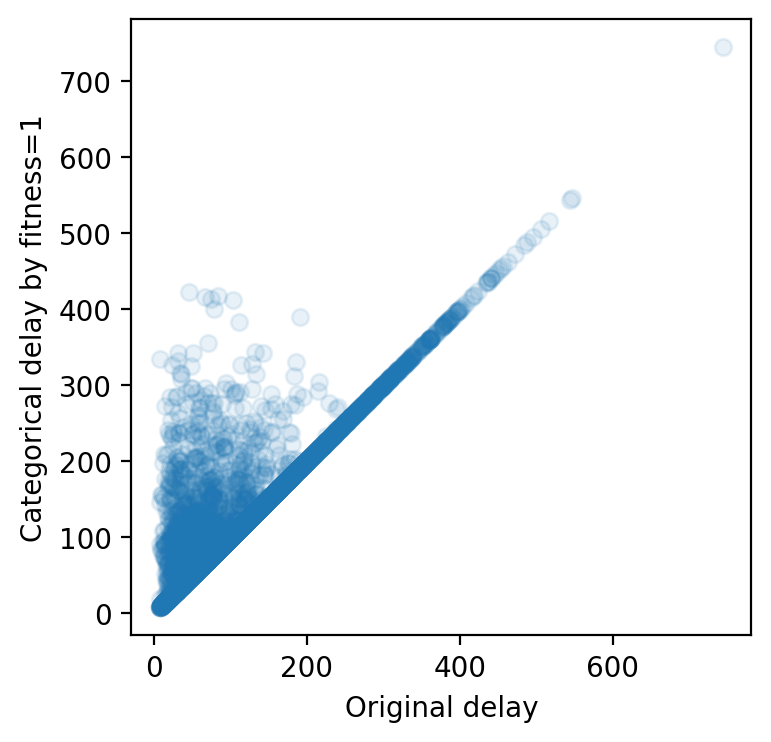

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=200)
ax.plot(
    samples,
    categorical_samples,
    "o",
    alpha=0.1,
)

ax.set_xlabel("Original delay")
ax.set_ylabel("Categorical delay by fitness=1")

In [109]:
annotated_df["categorical_delay"] = categorical_samples

In [110]:
annotated_df["fitness_is_max"] = (annotated_df["normalized_fitness"] == 1)

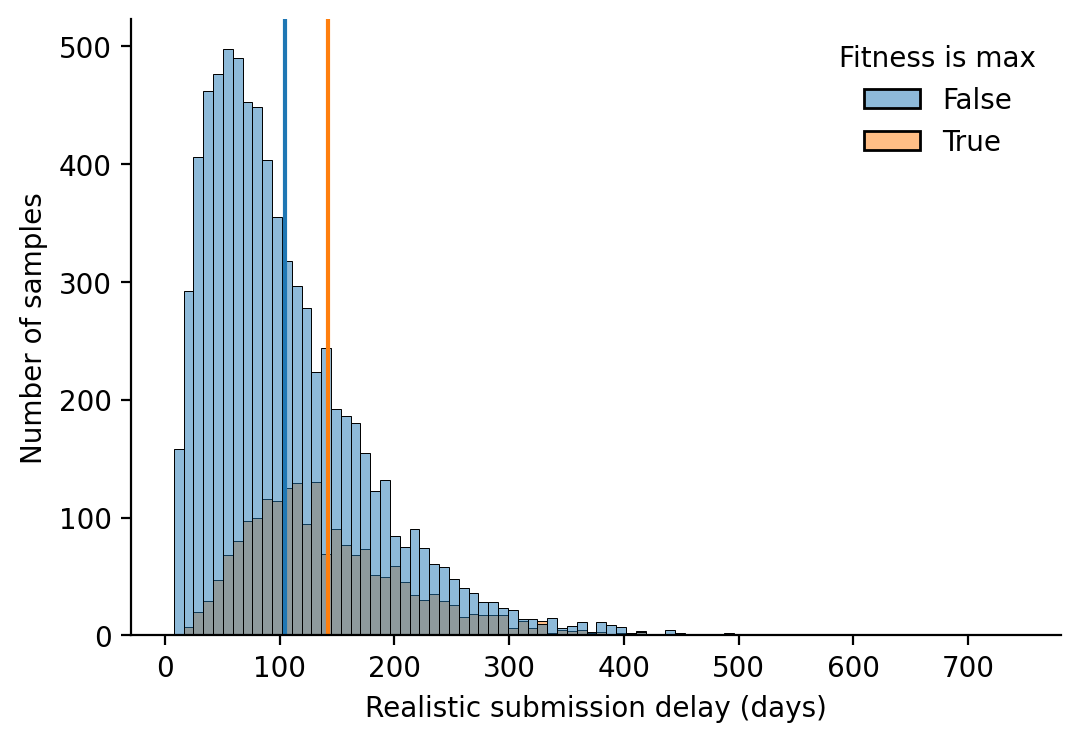

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
ax = sns.histplot(
    data=annotated_df,
    x="categorical_delay",
    hue="fitness_is_max",
    ax=ax,
)

mean_fitness_is_not_max = annotated_df[~annotated_df["fitness_is_max"]]["categorical_delay"].mean()
mean_fitness_is_max = annotated_df[annotated_df["fitness_is_max"]]["categorical_delay"].mean()

ax.axvline(x=mean_fitness_is_not_max, label="mean delay fitness < 1", color="C0")
ax.axvline(x=mean_fitness_is_max, label="mean delay fitness = 1", color="C1")

ax.set_xlabel("Realistic submission delay (days)")
ax.set_ylabel("Number of samples")

legend = ax.get_legend()
legend.set_title("Fitness is max")
legend.set_frame_on(False)

sns.despine()

In [113]:
annotated_df.groupby("fitness_is_max")["categorical_delay"].mean()

fitness_is_max
False    104.533694
True     141.733729
Name: categorical_delay, dtype: float64

In [124]:
delay_bins = np.arange(0, max(samples.max(), second_samples.max()), 10)

In [125]:
delay_bins

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
       440., 450., 460., 470., 480., 490., 500., 510., 520., 530., 540.,
       550., 560., 570., 580., 590., 600., 610., 620., 630., 640., 650.,
       660., 670., 680., 690., 700., 710., 720., 730., 740.])

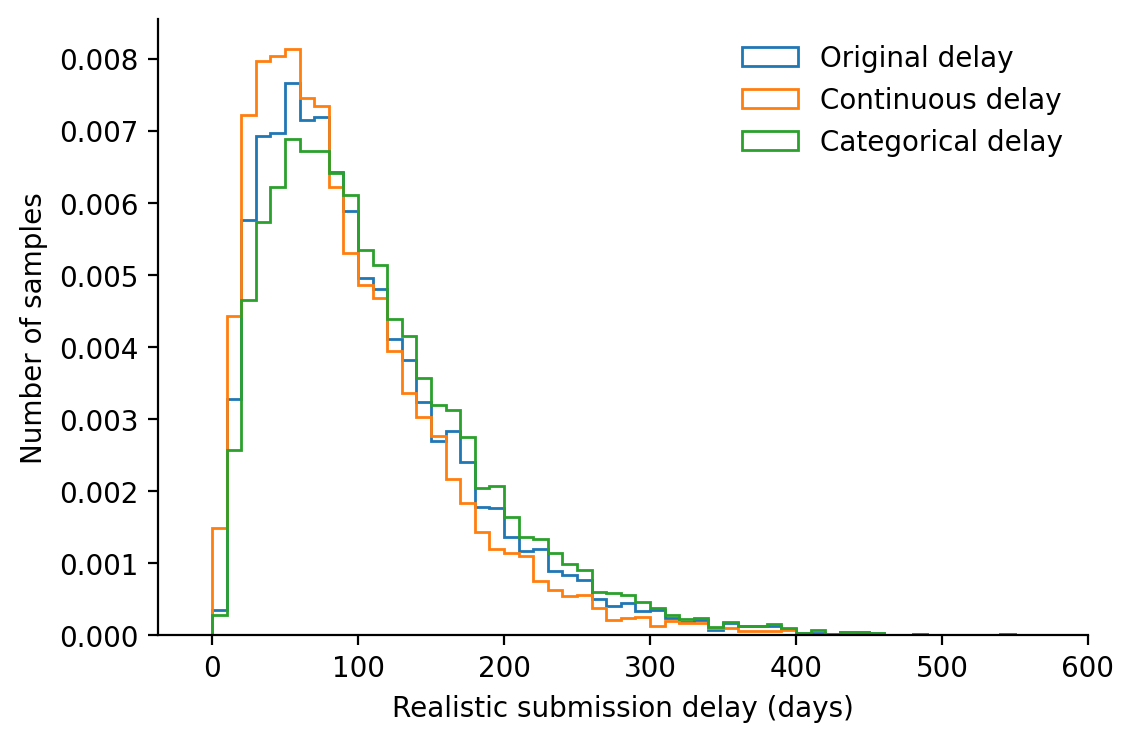

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
ax.hist(
    samples,
    label="Original delay",
    density=True,
    bins=delay_bins,
    histtype="step",
)

ax.hist(
    continuous_samples,
    label="Continuous delay",
    density=True,
    bins=delay_bins,
    histtype="step",
)

ax.hist(
    categorical_samples,
    label="Categorical delay",
    density=True,
    bins=delay_bins,
    histtype="step",
)

ax.set_xlabel("Realistic submission delay (days)")
ax.set_ylabel("Number of samples")
ax.set_xlim(right=600)

ax.legend(frameon=False)

sns.despine()